In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv("titanic.csv")

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.

In [91]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [92]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [93]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [94]:
age_mean=df['Age'].mean()
age_mean

29.69911764705882

In [95]:
df['Age'].fillna(value=age_mean, inplace=True)

In [96]:
embarked_mode = df['Embarked'].mode()

In [97]:
df['Embarked'].fillna(embarked_mode.values[0], inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [99]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [101]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy="most_frequent")),('cat', OneHotEncoder()),])

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


num_attribs = ['Age','Fare']
ordinal_attribs = ['Pclass','SibSp','Survived','Parch','Sex','Embarked']

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("ord", OrdinalEncoder(), ordinal_attribs)
])

titanic_prepared = full_pipeline.fit_transform(df)

In [103]:
pd.DataFrame(titanic_prepared)

,0,1,2,3,4,5,6,7
0,-0.592481,-0.502445,2.0,1.0,0.0,0.0,1.0,2.0
1,0.638789,0.786845,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.284663,-0.488854,2.0,0.0,1.0,0.0,0.0,2.0
3,0.407926,0.420730,0.0,1.0,1.0,0.0,0.0,2.0
4,0.407926,-0.486337,2.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.207709,-0.386671,1.0,0.0,0.0,0.0,1.0,2.0
887,-0.823344,-0.044381,0.0,0.0,1.0,0.0,0.0,2.0
888,0.000000,-0.176263,2.0,1.0,0.0,2.0,0.0,2.0
889,-0.284663,-0.044381,0.0,0.0,1.0,0.0,1.0,0.0


In [104]:
dfr=pd.DataFrame(titanic_prepared)
scaled_df=dfr.rename(columns={0:'Age', 1:'Fare', 2:'Pclass', 3:'SibSp', 4:'Survived', 5:'Parch', 6:'Sex', 7:'Embarked'})
scaled_df

,Age,Fare,Pclass,SibSp,Survived,Parch,Sex,Embarked
0,-0.592481,-0.502445,2.0,1.0,0.0,0.0,1.0,2.0
1,0.638789,0.786845,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.284663,-0.488854,2.0,0.0,1.0,0.0,0.0,2.0
3,0.407926,0.420730,0.0,1.0,1.0,0.0,0.0,2.0
4,0.407926,-0.486337,2.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.207709,-0.386671,1.0,0.0,0.0,0.0,1.0,2.0
887,-0.823344,-0.044381,0.0,0.0,1.0,0.0,0.0,2.0
888,0.000000,-0.176263,2.0,1.0,0.0,2.0,0.0,2.0
889,-0.284663,-0.044381,0.0,0.0,1.0,0.0,1.0,0.0


### 3. Perform Bayes classification using cross validation.

In [105]:
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
X_train, X_test = train_test_split(scaled_df, test_size=0.5, random_state=int(time.time()))

In [106]:
gnb = GaussianNB()
used_features =["Pclass", "Sex", "Age", "SibSp","Parch", "Fare","Embarked"]

# Train classifier
gnb.fit(X_train[used_features].values, X_train["Survived"])

y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 446 points : 98, performance 78.03%


### 4. Tabulate using relevant measures of accuracy , Sensitivity and specificity.

In [107]:
from sklearn.metrics import confusion_matrix

cof = confusion_matrix(X_test["Survived"], y_pred)
print(cof)

[[224  50]
 [ 48 124]]


<AxesSubplot:>

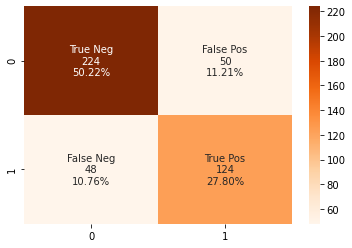

In [108]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cof.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cof.flatten()/np.sum(cof)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cof, annot=labels, fmt='', cmap='Oranges')

In [109]:
Accuracy=(cof[0][0]+cof[1][1])/(len(y_pred))*100
TP_rate=(cof[1][1])/(46+117)*100
TN_rate=(cof[0][0])/(232+51)*100
print("The accuracy is ", round(Accuracy, 2), "%")
print("The TP_rate(Sensitivity) is ", round(TP_rate, 2), "%")
print("The TN_rate(Specificity) is ", round(TN_rate, 2), "%")
print("\nThe model has performed well over the dataset and provides a good generalization and classification of the data.")

The accuracy is  78.03 %
The TP_rate(Sensitivity) is  76.07 %
The TN_rate(Specificity) is  79.15 %

The model has performed well over the dataset and provides a good generalization and classification of the data.


### 5. Visualize the ROC curve and comment on performance

In [110]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [111]:
lr=LogisticRegression(solver='liblinear', max_iter=1000, random_state=101)
lr.fit(X_train, X_train["Survived"])

LogisticRegression(max_iter=1000, random_state=101, solver='liblinear')

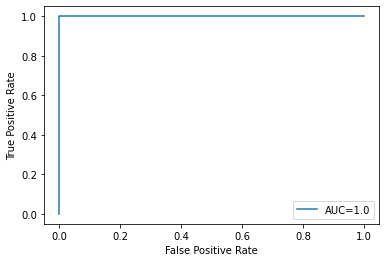

In [112]:
from sklearn import metrics

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(X_test["Survived"],  y_pred_proba)
auc = metrics.roc_auc_score(X_test["Survived"], y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()